Clauder Noronha

Brasília: 01/02/2022




##### Conjunto de dados públicos de comércio eletrônico brasileiro por Olist

Bem vinda! Este é um conjunto de dados público de e-commerce brasileiro de pedidos feitos na Olist Store . O conjunto de dados tem informações de 100 mil pedidos de 2016 a 2018 feitos em vários marketplaces no Brasil. Suas funcionalidades permitem visualizar um pedido a partir de múltiplas dimensões: desde o status do pedido, preço, pagamento e desempenho do frete até a localização do cliente, atributos do produto e, finalmente, avaliações escritas pelos clientes. Também lançamos um conjunto de dados de geolocalização que relaciona os CEPs brasileiros às coordenadas lat/lng.

Estes são dados comerciais reais, foram anonimizados e as referências às empresas e parceiros no texto da revisão foram substituídas pelos nomes das grandes casas de Game of Thrones.



##### Contexto:

Este conjunto de dados foi generosamente fornecido pela Olist, a maior loja de departamentos dos marketplaces brasileiros. A Olist conecta pequenas empresas de todo o Brasil a canais sem complicações e com um único contrato. Esses comerciantes podem vender seus produtos através da Olist Store e enviá-los diretamente aos clientes usando os parceiros de logística da Olist. Veja mais em nosso site: www.olist.com

Depois que um cliente compra o produto da Olist Store, um vendedor é notificado para atender esse pedido. Assim que o cliente recebe o produto, ou vence a data prevista de entrega, o cliente recebe uma pesquisa de satisfação por e-mail onde pode dar uma nota da experiência de compra e anotar alguns comentários.

-------------

O objetivo do projeto é trabalhar com a coluna "review_comment_message". Preparar 
os comentários e criar uma nuvem de palavras com os textos, para uma eventual tomada de decisão.


--------------

### PARTE 1 - ANÁLISE PALAVRAS SIMPLES (UNIGRAM)

In [1]:
import pandas as pd
import numpy as np
import string

from sklearn.feature_extraction.text import CountVectorizer

-----------

Importanto os dados:

In [2]:
dados = pd.read_csv('olist_order_reviews_dataset.csv')

In [3]:
dados.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


-----------

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


------------------

In [5]:
dados.shape

(99224, 7)

Criando um Dataframe;

In [6]:
#pegar a coluna de messagens (review_comment_message)

#CRIANDO NOVO DATAFRAME SOMENTE COM OS COMENTÁRIOS

dados_clean = dados[['review_comment_message']]


In [7]:
dados_clean.head()

,review_comment_message
0,NaN
1,NaN
2,NaN
3,Recebi bem antes do prazo estipulado.
4,Parabéns lojas lannister adorei comprar pela I...


-----------------

Apagar as linhas em branco;

In [8]:
#apagar

dados_clean = dados_clean.dropna(subset=['review_comment_message']).reset_index(drop=True)

In [9]:
dados_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40977 entries, 0 to 40976
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   review_comment_message  40977 non-null  object
dtypes: object(1)
memory usage: 320.3+ KB


----------------

##PREPARANDO E TRANSFORMANDO A BASE DE DADOS

- Padronizando Texto (minusculas)
- remover pontuações
- remover stopwords(palavras sem valor/irrelevantes)
- remover caracteres especiais (emojis, acentuações etc)
- transformando texto (bag of words) matriz de palavras com frequências absolutas

----------------

In [10]:
#Converter texto para minuscula e salvando em uma nova coluna


dados_clean['dados_convert'] = dados_clean.review_comment_message.str.lower()
dados_clean.head()

,review_comment_message,dados_convert
0,Recebi bem antes do prazo estipulado.,recebi bem antes do prazo estipulado.
1,Parabéns lojas lannister adorei comprar pela I...,parabéns lojas lannister adorei comprar pela i...
2,aparelho eficiente. no site a marca do aparelh...,aparelho eficiente. no site a marca do aparelh...
3,"Mas um pouco ,travando...pelo valor ta Boa.\r\n","mas um pouco ,travando...pelo valor ta boa.\r\n"
4,"Vendedor confiável, produto ok e entrega antes...","vendedor confiável, produto ok e entrega antes..."


----------------

Excluir a Pontuação do Texto;

In [11]:
# EXCLUINDO PONTUAÇÕES DOS TEXTOS
dados_clean['dados_convert'] = dados_clean.dados_convert.str.translate(str.maketrans('', '', string.punctuation))
dados_clean.head()

,review_comment_message,dados_convert
0,Recebi bem antes do prazo estipulado.,recebi bem antes do prazo estipulado
1,Parabéns lojas lannister adorei comprar pela I...,parabéns lojas lannister adorei comprar pela i...
2,aparelho eficiente. no site a marca do aparelh...,aparelho eficiente no site a marca do aparelho...
3,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",mas um pouco travandopelo valor ta boa\r\n
4,"Vendedor confiável, produto ok e entrega antes...",vendedor confiável produto ok e entrega antes ...


-------------

In [12]:
#(OPCIONAL)

#Excluindo a pontuação 


#dados_clean['dados_convert'] = dados_clean.dados_convert.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
#dados_clean.head()

In [12]:
dados_clean.isnull().sum()

review_comment_message    0
dados_convert             0
dtype: int64

------------------

converter toda a base de texto em uma matriz númericas


In [13]:


# MATRIZ "BAG OF WORD"
vectorizer = CountVectorizer()
matrix_words = vectorizer.fit_transform(dados_clean.dados_convert)

---------

Visualizando a Matriz


In [14]:
matrix_words.toarray()[:10]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Temos uma matriz

-----------

Somando a Frequência de Cada Palavra

In [15]:
#No Google colab acontece de estourar o tempo, isso pode ocasionar o reinicio 
#temos uma base de dados de 40 mil comentarios 


freq_words = matrix_words.toarray().sum(axis=0)
words = vectorizer.get_feature_names()


words[:5],freq_words[:5]

(['00', '000580', '001063', '001689', '003566'],
 array([2, 1, 1, 2, 1], dtype=int64))

CONVERTER A MATRIZ PARA UM DATAFRAME COM FREQUENCIA ABSOLUTA

In [16]:
df_freq_words = pd.DataFrame({'palavra':words, 'freq':freq_words})
df_freq_words

,palavra,freq
0,00,2
1,000580,1
2,001063,1
3,001689,2
4,003566,1
...,...,...
19105,úteis,53
19106,úteisesperei,1
19107,útil,36
19108,útilbem,1


-------------------------------

#### Ordenando Linhas pela Coluna "FREQ"

In [17]:
df_freq_words = df_freq_words.sort_values('freq', ascending='False')
df_freq_words

,palavra,freq
19109,ünica,1
7892,espaçorecomendo,1
14528,previamente,1
14526,prevenir,1
14524,pretão,1
...,...,...
15234,que,8307
12688,não,10710
6782,do,11143
5814,de,11307


##### Temos a quantidade de palavras com mais frequência

----------------------------------

##### vamos utilizar o stopwords para limpar a base de dados

BAIXANDO BASE DE DADOS COM STOPWORDS

In [18]:
from nltk.corpus import stopwords

-------------------------------------

Carregar StopWords em Português

In [22]:


stopwords_pt = stopwords.words('portuguese')


#Remover a palavra Não 

stopwords_pt.remove('não')



stopwords_pt[:10]


['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um']

--------------------------------------

In [ ]:
#Excluindo a pontuação 


#dados_clean['dados_convert'] = dados_clean.dados_convert.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
#dados_clean.head()

---------------------------

Remover os StopWords

In [26]:
#loop para percorrer cada linha de comentário para remover os Stopwords

texto_limpo = []
for text in dados_clean.dados_convert:
    t = ' '.join([word for word in text.split() if word not in stopwords_pt])
    texto_limpo.append(t)
texto_limpo[:5]    

['recebi bem antes prazo estipulado',
 'parabéns lojas lannister adorei comprar internet seguro prático parabéns todos feliz páscoa',
 'aparelho eficiente site marca aparelho impresso 3desinfector chegar outro nomeatualizar marca correta vez aparelho',
 'pouco travandopelo valor ta boa',
 'vendedor confiável produto ok entrega antes prazo']

#####  Fiz todo o processo de limpeza de texto

--------------------------------

COMPARANDO O TEXTO SEM STOPWORDS

In [27]:
#COMPARANDO O TEXTO SEM STOPWORDS

dados_clean['dados_convert'] = texto_limpo
dados_clean.head(5)

,review_comment_message,dados_convert
0,Recebi bem antes do prazo estipulado.,recebi bem antes prazo estipulado
1,Parabéns lojas lannister adorei comprar pela I...,parabéns lojas lannister adorei comprar intern...
2,aparelho eficiente. no site a marca do aparelh...,aparelho eficiente site marca aparelho impress...
3,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",pouco travandopelo valor ta boa
4,"Vendedor confiável, produto ok e entrega antes...",vendedor confiável produto ok entrega antes prazo


----------------------------

### Excluindo StopWords Especificas

-----------------------------

In [29]:
# REFAZENDO A MATRIZ "BAG OF WORD" COM OS NOVOS COMENTÁRIO
vectorizer = CountVectorizer() 
matrix_words = vectorizer.fit_transform(dados_clean.dados_convert)

freq_words = matrix_words.toarray().sum(axis=0)
words = vectorizer.get_feature_names()

df_freq_words = pd.DataFrame({'palavra':words,'freq':freq_words})
df_freq_words = df_freq_words.sort_values('freq',ascending=False)
df_freq_words

,palavra,freq
14612,produto,18160
12602,não,10710
14146,prazo,8262
7498,entrega,6410
2228,antes,5609
...,...,...
7884,especificando,1
7886,especificaçao,1
7889,especificaçãodentro,1
7890,especificaçãomas,1


----------------

**excluindo stopwords especificas**
- em alguns casos/negócios existem algumas palavras que são irrelevantes, além das stopwords

In [31]:
stopwords_pt = stopwords.words("portuguese")
stopwords_pt.remove('não')
## adicionando novas palavras específicas na lista de stopwords
stopwords_pt.extend(['ünica','especificaçãodentro','especificaçao'])

texto_limpo = []
for text in dados_clean.dados_convert:
  t = ' '.join([word for word in text.split() if word not in stopwords_pt])
  texto_limpo.append(t)

dados_clean['dados_convert'] = texto_limpo

------------------------

#### REFAZENDO A MATRIZ "BAG OF WORD" COM OS NOVOS COMENTÁRIO

In [32]:
# REFAZENDO A MATRIZ "BAG OF WORD" COM OS NOVOS COMENTÁRIO

vectorizer = CountVectorizer()#ngram_range=(1, 2),token_pattern=r'\b\w+\b', min_df=1)
matrix_words = vectorizer.fit_transform(dados_clean.dados_convert)

freq_words = matrix_words.toarray().sum(axis=0)
words = vectorizer.get_feature_names()

df_freq_words = pd.DataFrame({'palavra':words,'freq':freq_words})
df_freq_words = df_freq_words.sort_values('freq',ascending=False)
df_freq_words

,palavra,freq
14610,produto,18160
12600,não,10710
14144,prazo,8262
7498,entrega,6410
2228,antes,5609
...,...,...
11037,lindoloja,1
11038,lindomacio,1
11039,lindomaior,1
11040,lindominhas,1


------------------------------

In [46]:
#pip install wordcloud

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt


from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


#Se você estiver usando o conda, poderá instalar a partir do conda-forgecanal:
#no terminal de comando
#conda install -c conda-forge wordcloud



--------------------------------------

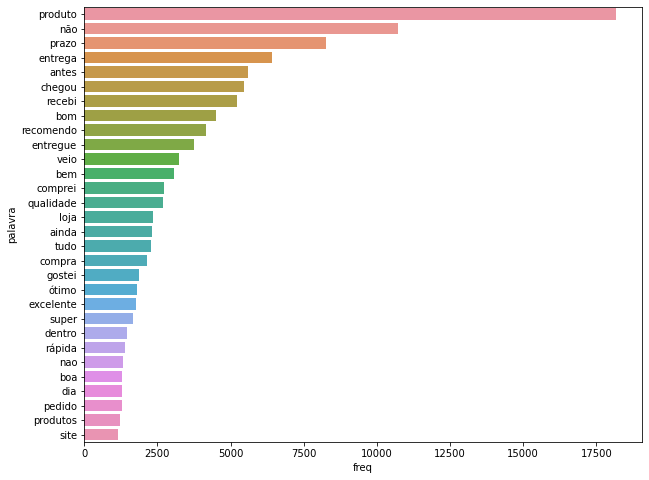

In [33]:

# GRÁFICO DE BARRA HORIZONTAL
plt.figure(figsize=(10,8))
sns.barplot(x='freq',y='palavra',data=df_freq_words.iloc[:30,:])
plt.show()

--------------------------------------------------

### CONCATENANDO TODOS OS COMENTÁRIOS EM UMA VARIÁVEL

In [34]:

todos_comentarios = ' '.join(dados_clean.dados_convert)
todos_comentarios

'recebi bem antes prazo estipulado parabéns lojas lannister adorei comprar internet seguro prático parabéns todos feliz páscoa aparelho eficiente site marca aparelho impresso 3desinfector chegar outro nomeatualizar marca correta vez aparelho pouco travandopelo valor ta boa vendedor confiável produto ok entrega antes prazo gostaria saber sempre recebi compra agora decpcionou péssimo loja nota 10 obrigado atençao amim dispensada compra realizada facilmente entrega efetuada antes prazo dado produto começou ser usado presente problemas relógio bonito barato não gostei comprei gato lebre sempre compro internet entrega ocorre antes prazo combinado acredito ser prazo máximo stark prazo máximo esgotou ainda não recebi produto recebi exatamente esperava demais encomendas outros vendedores atrasaram chegou prazo recomendo boa tô completamente apaixonada loja super responsável confiável nada chegar pedido bom cheiroso otimo vendedor chegou ate antes prazo adorei produto processo compra tranquilo 

-----------------------------------------------

##### FAZENDO WORDCLOUD

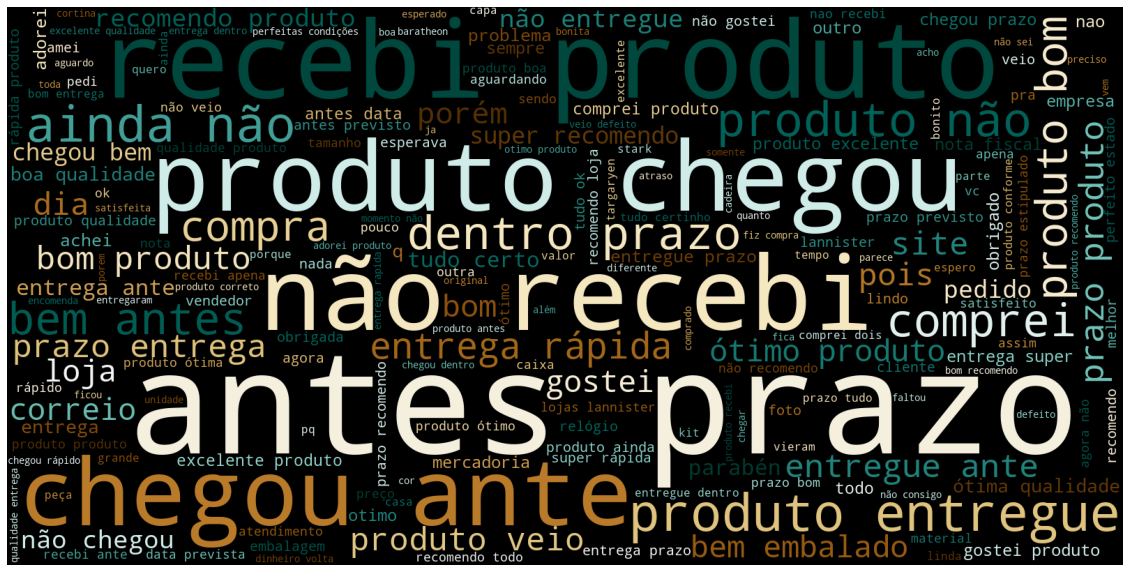

In [47]:


wordcloud = WordCloud(width=1600, height=800,random_state=42,background_color='black',colormap='BrBG_r').generate(todos_comentarios)


#Com quantidade de frequência de palavras a palavra na wordcloud vai aumentando.


fig, ax = plt.subplots(figsize=(20,15))
ax.imshow(wordcloud)#, interpolation='bilinear')
ax.set_axis_off()

WordCloud gerou com as palavras separadas 

-------------

### PARTE 2 - ANÁLISE PALAVRAS DUPLAS (BIGRAM - 2 palavras)

-----------------------

 - O bigrama pega as frases inteira.
 - O bigrama faz a combinação de duas em duas palavras 
  
  
    Ex:
      
       - Hoje em MG está frio.
       
          - Unigram: hoje - em - MG - está - frio
          
          - bigram: hoje em - em MG - MG esta - esta frio
          
          - trigam: hoje em MG - em MG esta - MG esta frio
           

-----------------

In [50]:
dados_clean['dados_convert'] = dados_clean.review_comment_message.str.lower() #padronizar minúsculo
dados_clean['dados_convert'] = dados_clean.dados_convert.str.translate(str.maketrans(' ', ' ', string.punctuation)) #remover pontuação
#review_clean['comment_clean'] = review_clean.comment_clean.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8') #remover acentuação

stopwords_pt = stopwords.words("portuguese")
stopwords_pt.remove('não') # essa stopwords é extreamente importante para essa análise, por isso foi removida
#stopwords_pt = pd.Series(stopwords_pt).str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8') # SÓ UTILIZAR SE APLICAR A REMOÇÃO DE ACENTUAÇãO

texto_limpo = []
for text in dados_clean.dados_convert:
  t = ' '.join([word for word in text.split() if word not in stopwords_pt])
  texto_limpo.append(t)

dados_clean['dados_convert'] = texto_limpo

----------------------

### REFAZENDO A MATRIZ "BAG OF WORD" COM BI-GRAM(2 palvras)

In [51]:

vectorizer_bigram = CountVectorizer(ngram_range=(3, 3),min_df=2)
matrix_bigram = vectorizer_bigram.fit_transform(dados_clean.dados_convert)

freq_bigram = matrix_bigram.toarray().sum(axis=0)
bigram = vectorizer_bigram.get_feature_names()

matrix_bigram.shape

(40977, 13646)

-----------------------

In [52]:
df_freq_bigram = pd.DataFrame({'palavra':bigram,'freq':freq_bigram})
df_freq_bigram = df_freq_bigram.sort_values('freq',ascending=False)
df_freq_bigram

,palavra,freq
1939,chegou antes prazo,1087
7319,não recebi produto,874
1159,bem antes prazo,675
4432,entregue antes prazo,599
9488,produto chegou antes,455
...,...,...
5728,informando produto não,2
5729,informar motivo atraso,2
5730,informar produto não,2
5731,informaram 48 horas,2


-----------------------

#### GRÁFICO DE BARRA HORIZONTAL

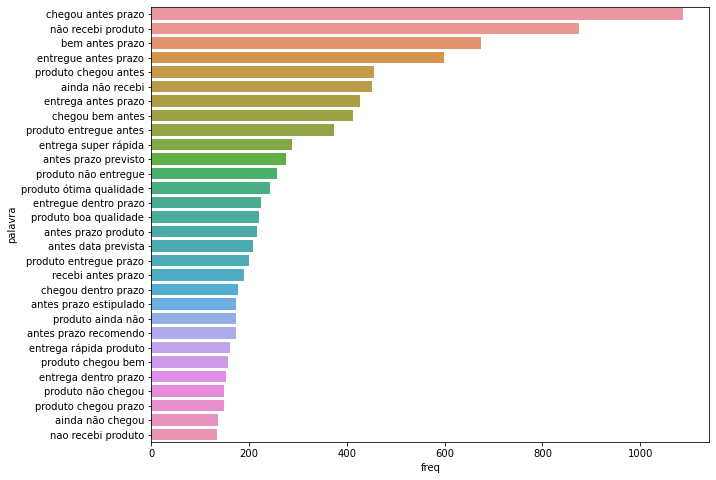

In [53]:

plt.figure(figsize=(10,8))
sns.barplot(x='freq',y='palavra',data=df_freq_bigram.iloc[:30,:])
plt.show()

-----------------------

#### INSTALAÇÃO LIB, NECESSÁRIA PARA USAR NO WORDCLOUD

In [55]:
#!pip install multidict

In [56]:
import multidict

# CONVERTENDO DATAFRAME PARA MULTIDICT. REQUISITO DO PACOTE PARA TRABALHAR COM FREQUENCIAS
freq_bigram = multidict.MultiDict()
for x in df_freq_bigram.itertuples():
  freq_bigram.add(x.palavra,x.freq)

freq_bigram

<MultiDict('chegou antes prazo': 1087, 'não recebi produto': 874, 'bem antes prazo': 675, 'entregue antes prazo': 599, 'produto chegou antes': 455, 'ainda não recebi': 451, 'entrega antes prazo': 427, 'chegou bem antes': 412, 'produto entregue antes': 374, 'entrega super rápida': 287, 'antes prazo previsto': 276, 'produto não entregue': 257, 'produto ótima qualidade': 242, 'entregue dentro prazo': 224, 'produto boa qualidade': 221, 'antes prazo produto': 217, 'antes data prevista': 208, 'produto entregue prazo': 199, 'recebi antes prazo': 190, 'chegou dentro prazo': 177, 'antes prazo estipulado': 174, 'produto ainda não': 174, 'antes prazo recomendo': 173, 'entrega rápida produto': 160, 'produto chegou bem': 157, 'entrega dentro prazo': 153, 'produto não chegou': 149, 'produto chegou prazo': 149, 'ainda não chegou': 136, 'nao recebi produto': 135, 'recebi produto antes': 130, 'entregue bem antes': 128, 'produto entregue dentro': 125, 'produto antes prazo': 123, 'chegou antes previsto':

----------------

#### FAZENDO WORDCLOUD COM DICIONÁRIO DE FREQUENCIA

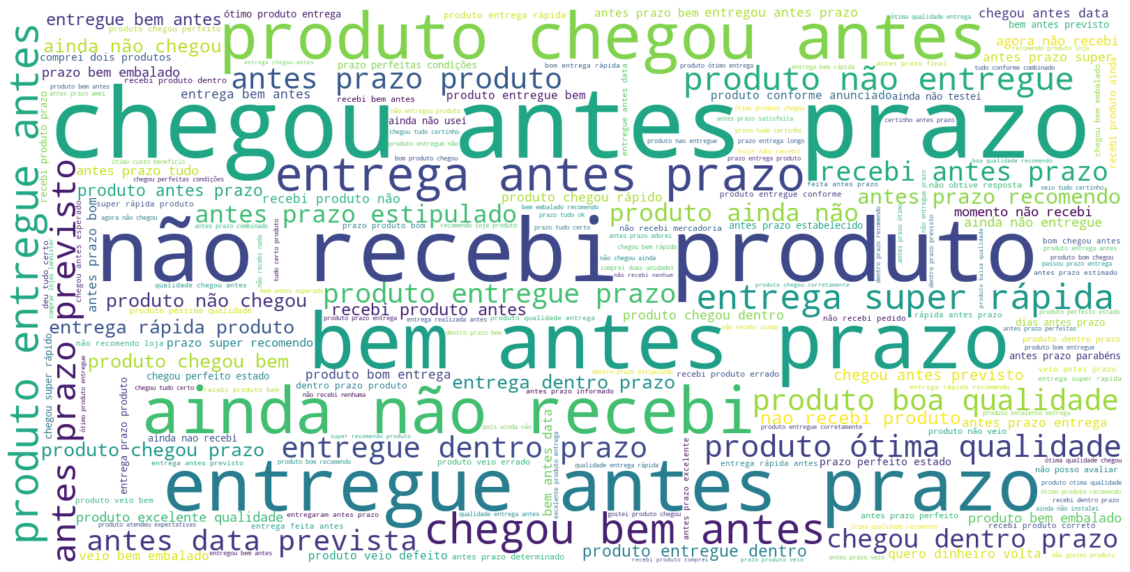

In [57]:

wordcloud = WordCloud(width=1600, height=800,random_state=42,background_color='white').generate_from_frequencies(freq_bigram)

fig, ax = plt.subplots(figsize=(20,13))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

---------------

#### Clauder Noronha

-------------